# 2D Diffusion

The convection portion of the lessons first extended the convection equation to 2 dimensions by introducing variation in the velocity in the y-direction. It then finally introduced a y-velocity. We will begin with 2D diffusion by introducing y-variation to the velocity u (x-direction velocity).

This version of the diffusion equation is:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

The discretization is:

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

which leads to:

$$\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Initialize variables
nx = 31
ny = 31
nt = 17
nu = .05
L = 2
dx = L / (nx - 1)
dy = L / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

In [3]:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)

In [8]:
u = np.ones((nx, ny))
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2

Text(0.5, 0, 'y')

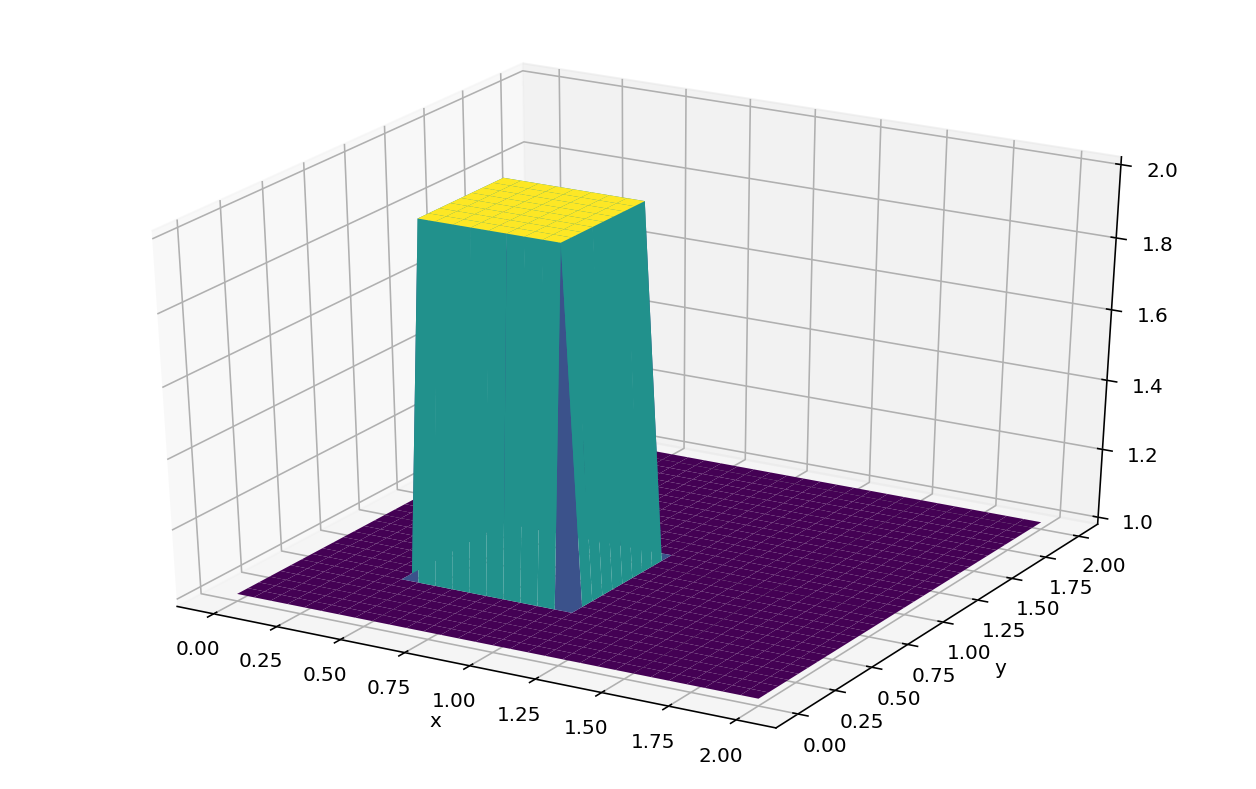

In [13]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)
plt.xlabel('x')
plt.ylabel('y')

$$\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}$$

In [31]:
# MAIN LOOP ##
for n in range(nt):
    un = np.copy(u)
    u[1:-1, 1:-1] = un[1:-1, 1:-1] + nu*dt/dx**2 * (un[2:, 1:-1]-2*un[1:-1, 1:-1]+un[:-2, 1:-1]) \
    + nu*dt/dy**2 * (un[1:-1, 2:]-2*un[1:-1, 1:-1]+un[1:-1, :-2])
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

Text(0.5, 0, 'y')

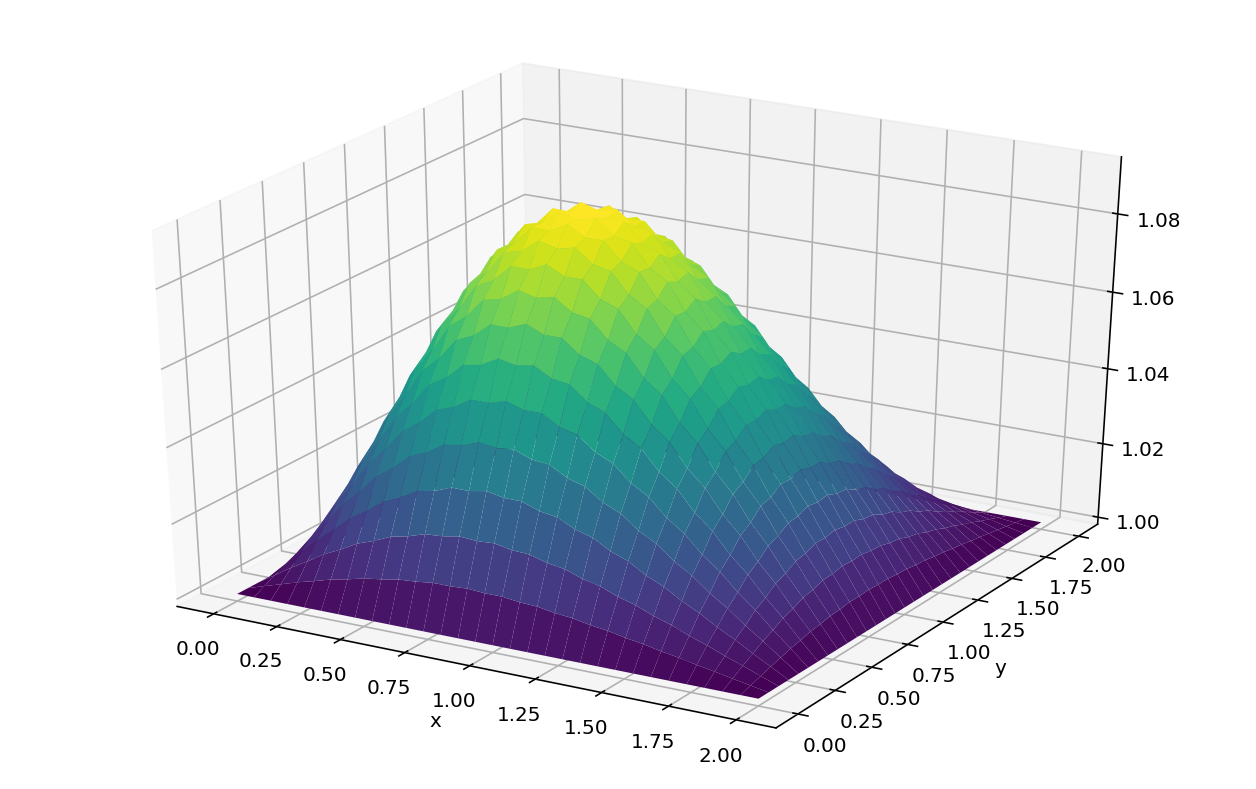

In [32]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u, cmap=cm.viridis)
plt.xlabel('x')
plt.ylabel('y')

Alternatively, we can make a function that produces a graph that takes a number of time steps as an input.

In [41]:
def diffusion(nt):
    # Initialize variables
    nx = 31
    ny = 31
    nu = .05
    L = 2
    dx = L / (nx - 1)
    dy = L / (ny - 1)
    sigma = .25
    dt = sigma * dx * dy / nu
    x = np.linspace(0, L, nx)
    y = np.linspace(0, L, ny)
    u = np.ones((nx, ny))
    u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2
    for n in range(nt):
        un = np.copy(u)
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + nu*dt/dx**2 * (un[2:, 1:-1]-2*un[1:-1, 1:-1]+un[:-2, 1:-1]) \
        + nu*dt/dy**2 * (un[1:-1, 2:]-2*un[1:-1, 1:-1]+un[1:-1, :-2])
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    fig = plt.figure(figsize=(11,7))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u, cmap=cm.viridis, antialiased=True)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_zlim([1, 2.5])

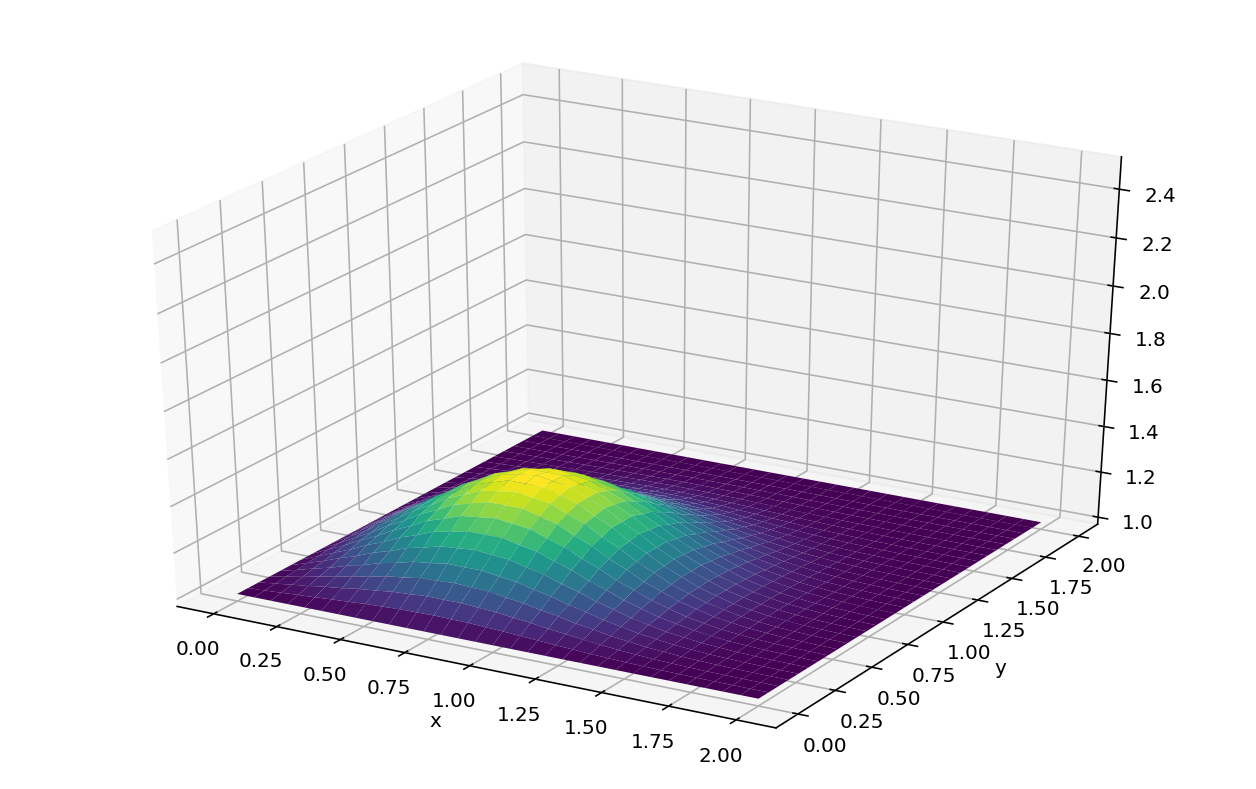

In [54]:
diffusion(50)